# Output analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

In [3]:
import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont('Minion Pro Regular.ttf')
matplotlib.rc('font', family='Minion Pro')

from matplotlib import rcParams
rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the optimization:

In [4]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns= "Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v160,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,0.027947,0.131059,0.591014,0.243223,-0.171975,0.922350,-0.682140,0.114627,-0.127719,0.790169,...,0.758679,0.012339,0.719512,0.687508,2.814780,0.476153,0.208333,0.000000,0.0,9.221317
1,0.024325,0.115591,0.424972,0.243304,-0.166715,0.990764,-0.668032,0.361160,-0.129505,0.778908,...,0.973504,0.022672,0.789997,0.162150,1.728515,0.353015,0.125000,0.000000,0.0,8.948835
2,0.024026,0.114508,0.568762,0.243224,-0.167009,0.919684,-0.675695,0.106843,-0.123143,0.801311,...,0.781254,0.017947,0.715803,0.156228,1.664127,0.435423,0.041667,0.000000,0.0,8.565585
3,0.022454,0.109287,0.593795,0.243316,-0.101543,0.924566,-0.640389,0.381233,-0.127204,0.794849,...,0.786548,0.014372,0.795097,0.131470,1.639068,0.301904,0.112500,0.012027,0.0,8.531358
4,0.024424,0.112817,0.425391,0.243317,-0.166762,0.990764,-0.664715,0.147727,-0.123543,0.778908,...,0.973211,0.006868,0.711863,0.162150,2.114361,0.571142,0.008333,0.000000,0.0,9.004483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.008806,0.114819,0.579638,0.243310,-0.165612,0.938977,-0.695591,0.377436,-0.129997,0.729516,...,0.761470,0.013426,0.712435,0.153043,2.260566,0.550351,0.070833,0.000000,0.0,9.210894
589,0.017687,0.117494,0.579510,0.243311,-0.167372,0.931333,-0.662333,0.160725,-0.129022,0.533547,...,0.973823,0.014024,0.712278,0.155727,1.597216,0.411051,0.083333,0.007651,0.0,8.773595
590,0.003513,0.125735,0.596069,0.243307,-0.163718,0.938075,-0.662967,0.323452,-0.132976,0.780159,...,0.750061,0.022330,0.722204,0.151736,1.847720,0.383999,0.116667,0.000000,0.0,9.035529
591,0.022088,0.161696,0.582672,0.243175,-0.165410,0.912693,-0.664111,0.384960,-0.129684,0.862924,...,0.781585,0.013095,0.708676,0.290073,2.208182,0.379160,0.154167,0.000000,0.0,9.131343


Let's split the policy and objective value dataframes:

In [5]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [6]:
objectives.describe()

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
count,593.000000,593.000000,593.000000,593.000000,593.0,593.000000
mean,2.002313,0.482507,0.076890,0.001726,0.0,9.027635
std,0.281946,0.135609,0.043181,0.004642,0.0,0.198483
min,1.597216,0.127779,0.000000,0.000000,0.0,8.168452
25%,1.757204,0.395520,0.041667,0.000000,0.0,8.904163
50%,1.952360,0.483666,0.075000,0.000000,0.0,9.094785
75%,2.199914,0.581710,0.108333,0.000000,0.0,9.185173
max,2.814780,0.834132,0.212500,0.038034,0.0,9.232259


In [7]:
(objectives.sudan_90 > 0).sum()

0

Let's kick out the Sudan Irrigation and Sudan 90 objectives as no meaningful deficit occured (only few non-zero values):

In [8]:
objectives = objectives.drop(columns=["sudan_irr", "sudan_90"])

Query the policies which yield best performance with respect to each objective:

In [9]:
best_obj_indices = dict()
directions = ["min", "min", "min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(),:].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(),:].index
    else: print("issue with directions!")
        
    best_obj_indices[obj] = indexes

In [10]:
best_obj_indices

{'egypt_irr': Int64Index([589], dtype='int64'),
 'egypt_90': Int64Index([464], dtype='int64'),
 'egypt_low_had': Int64Index([135, 237], dtype='int64'),
 'ethiopia_hydro': Int64Index([531], dtype='int64')}

Sudan irrigation deficit is minimised by many policies

In [11]:
best_egypt_irr = policies.loc[589]
best_egypt_90 = policies.loc[464]
best_egypt_low_had = policies.loc[135]
best_ethiopia = policies.loc[531]

Before redoing the simulation with found policies, let's do some objectives visualization:

### Parallel Coordinates Plot

In [12]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min": best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max": best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)
        
    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0.

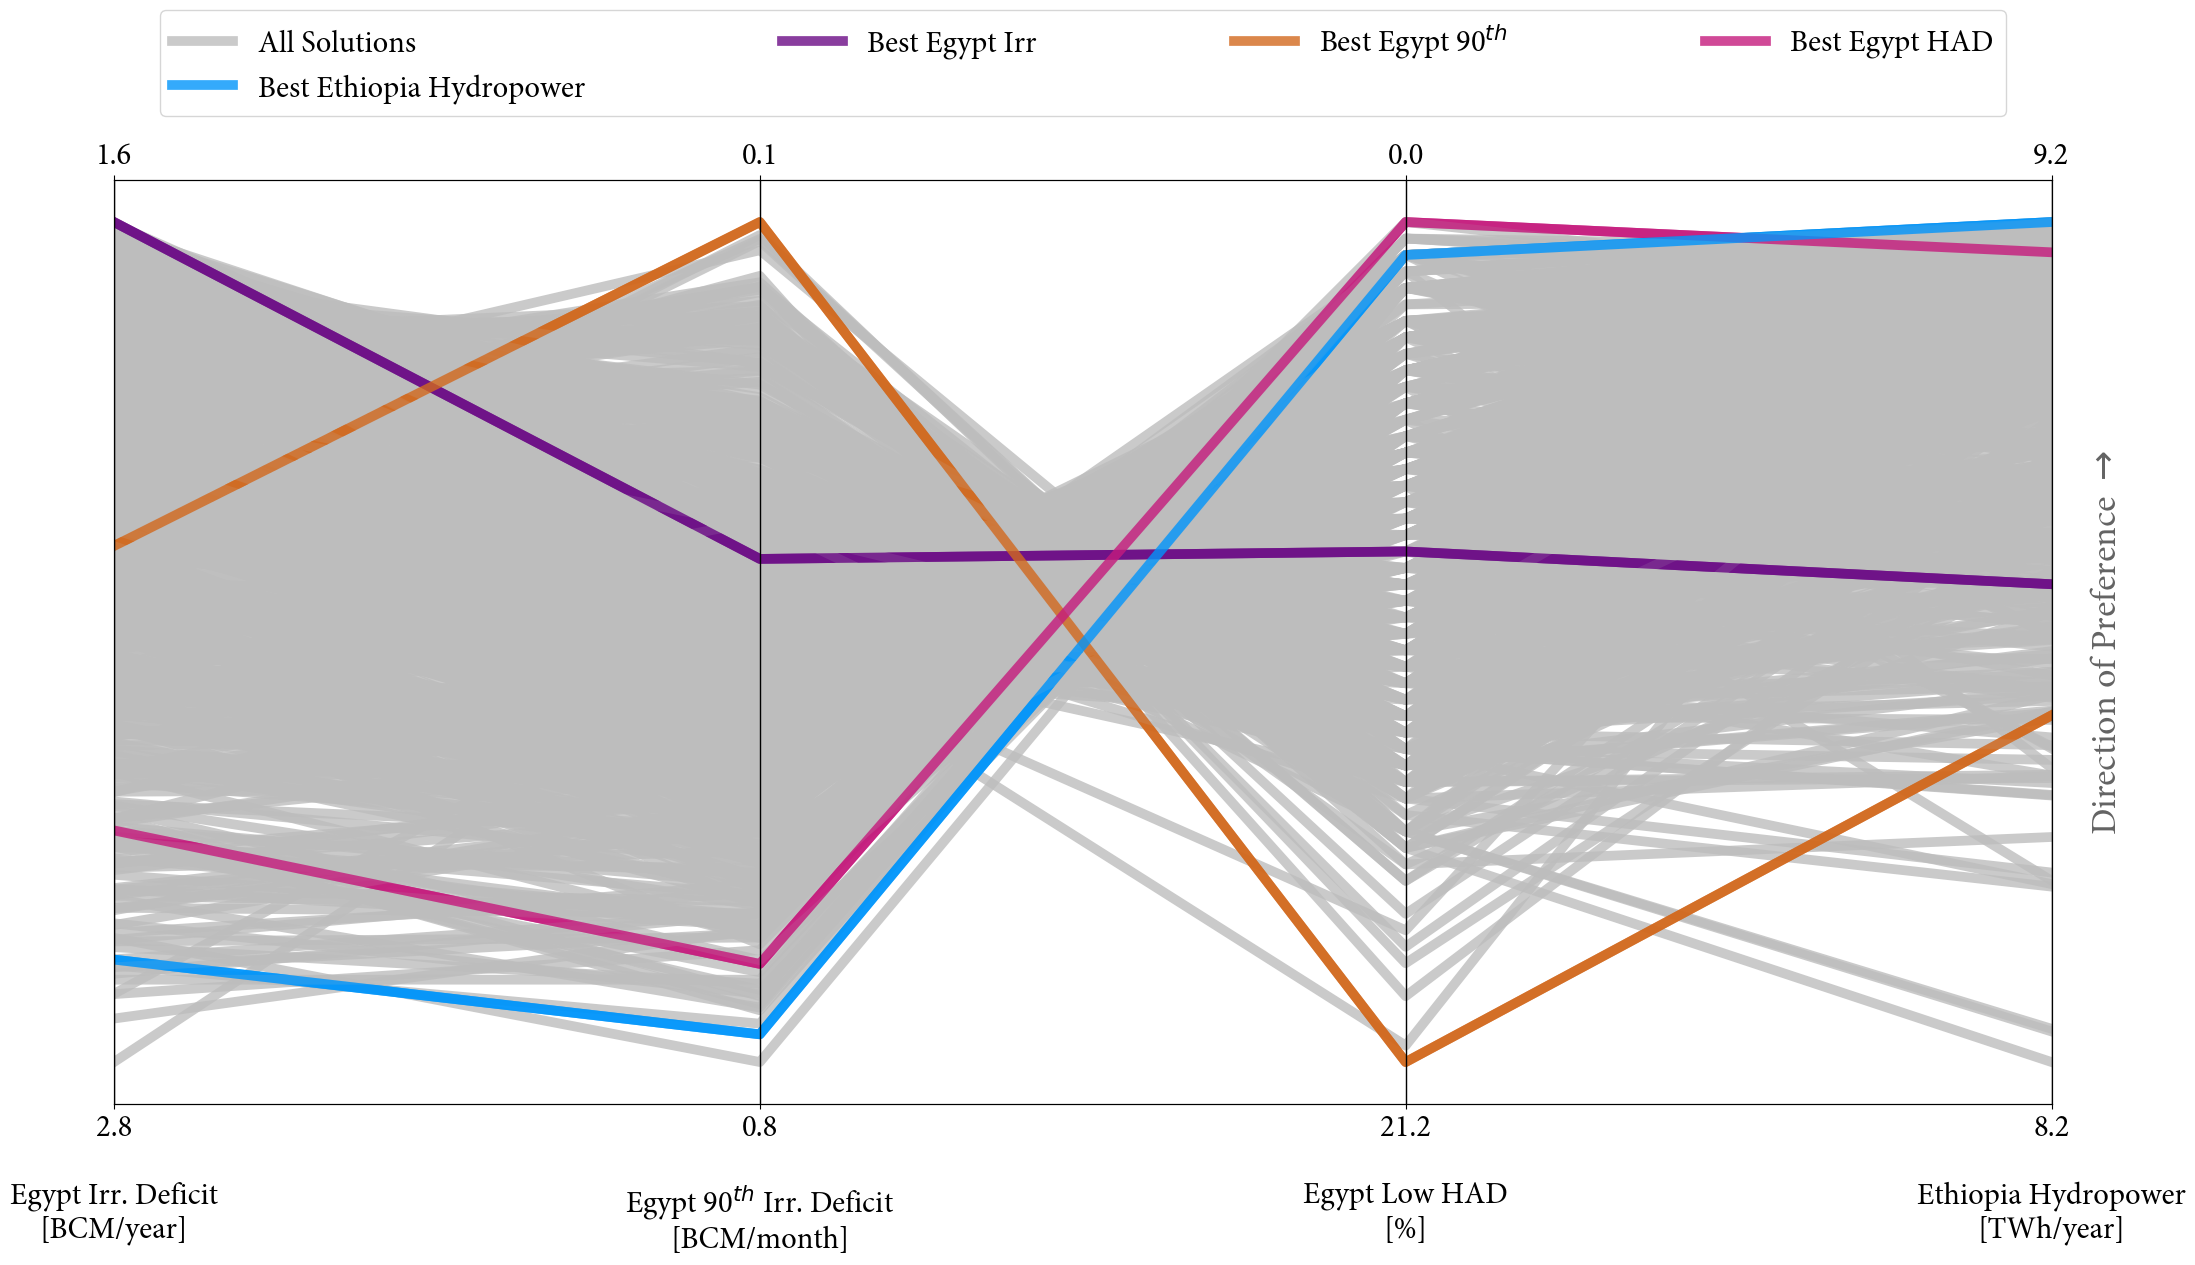

In [13]:
from plotter import parallel_plots_many_policies
parallel_plots_many_policies(objectives, solution_indices = [589,464, 135, 531],
               solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$", "Best Egypt HAD", "Best Ethiopia Hydropower"])

In [14]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "max"]
)

In [15]:
def find_percentile_compromise_solutions(objectives_norm_df, percentile):
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index)
        
    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list: break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)
        
    return common_indices
    

In [16]:
def find_threshold_compromise_solutions(objectives_norm_df, threshold):
    index_lists = []
    for col in objectives_norm_df.columns:
        index_lists.append(objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index)
        
    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list: break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)
        
    return common_indices

In [17]:
find_percentile_compromise_solutions(norm_df, 50)

[22, 314]

In [18]:
find_threshold_compromise_solutions(norm_df, 0.62)

[90, 471]

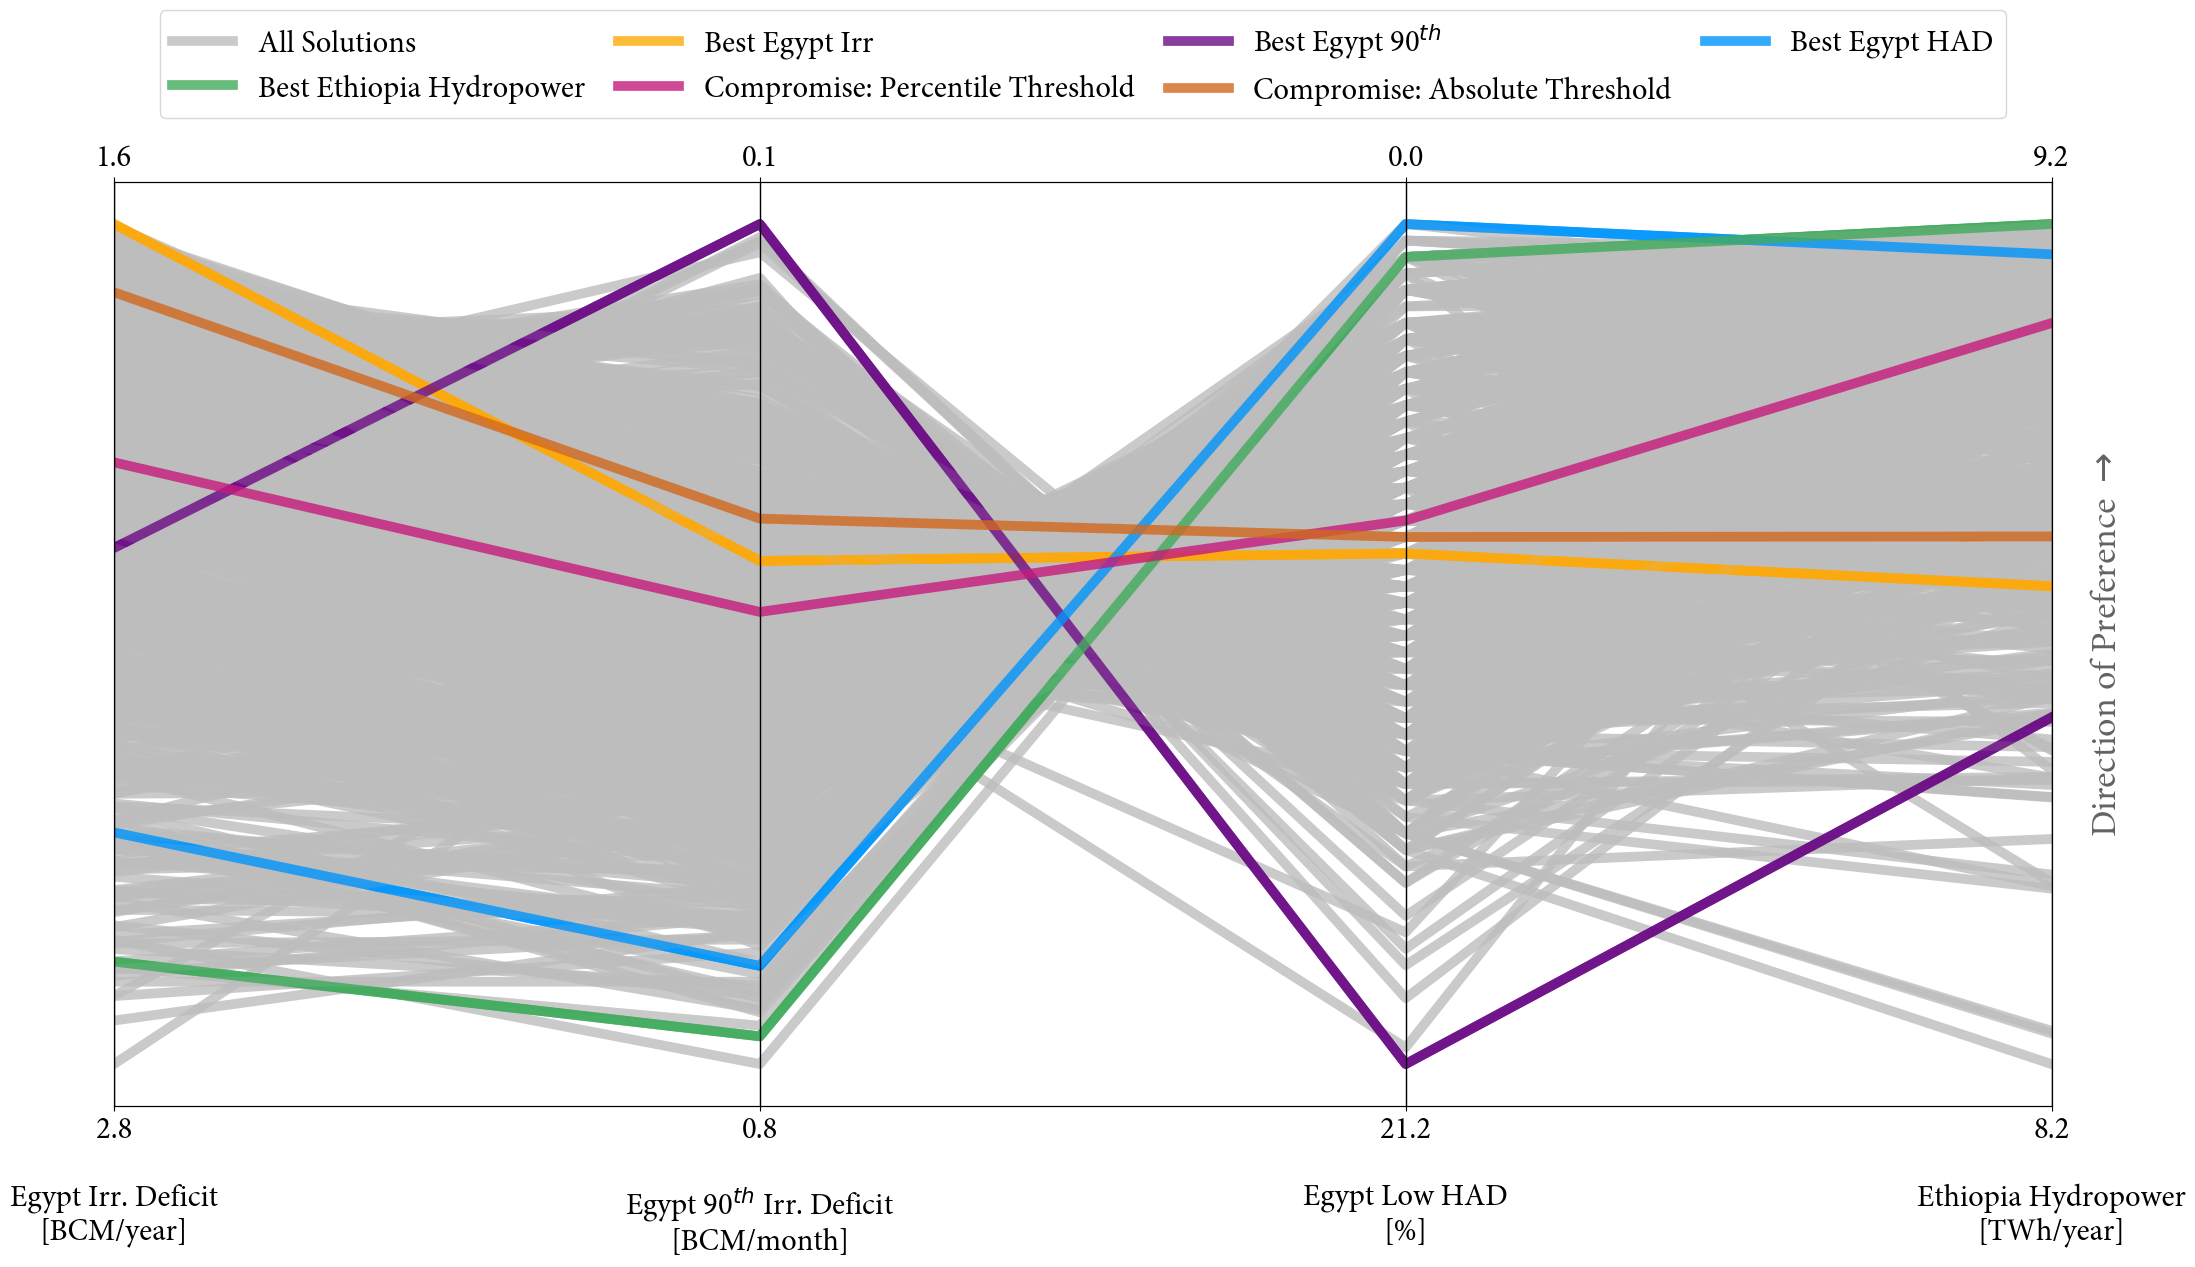

In [19]:
solution_indices = [589,464, 135, 531, 22, 90]
solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$", "Best Egypt HAD", "Best Ethiopia Hydropower",
                  "Compromise: Percentile Threshold", "Compromise: Absolute Threshold"]

parallel_plots_many_policies(objectives, solution_indices=solution_indices,
               solution_names=solution_names, saved=True)

In [21]:
policies_for_exploration = policies.loc[[589,464, 135, 531, 22, 90],:]
policies_for_exploration["name"] = ["best_egypt_aggregate", "best_egypt_90", "best_egypt_HAD", "best_ethiopia",
                                    "compromise_percentile","compromise_threshold"]
policies_for_exploration

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v155,v156,v157,v158,v159,v160,v161,v162,v163,name
589,0.017687,0.117494,0.579510,0.243311,-0.167372,0.931333,-0.662333,0.160725,-0.129022,0.533547,...,0.555250,0.210552,0.579472,0.286609,0.843848,0.973823,0.014024,0.712278,0.155727,best_egypt_aggregate
464,0.028105,0.114262,0.591471,0.243325,-0.127380,0.925554,-0.662937,0.146859,-0.126928,0.544960,...,0.555518,0.274941,0.579810,0.332976,0.825123,0.757043,0.041755,0.692679,0.274239,best_egypt_90
135,0.021944,0.114025,0.571704,0.243001,-0.171377,0.925046,-0.662151,0.044325,-0.127567,0.535654,...,0.550108,0.241124,0.548480,0.274140,0.825911,0.781773,0.005728,0.711918,0.152960,best_egypt_HAD
531,0.003708,0.115381,0.579933,0.243236,-0.179571,0.871061,-0.662337,0.096831,-0.127855,0.695501,...,0.555957,0.224321,0.579576,0.259177,0.706314,0.781638,0.013665,0.694450,0.130963,best_ethiopia
22,0.022115,0.128177,0.583797,0.243355,-0.170974,0.880154,-0.680358,0.100140,-0.119087,0.458011,...,0.552189,0.243282,0.692676,0.289307,0.886363,0.783127,0.018444,0.693333,0.269980,compromise_percentile
90,0.028174,0.115582,0.425391,0.243304,-0.100695,0.934728,-0.659982,0.128874,-0.129505,0.779006,...,0.558275,0.242113,0.579591,0.400533,0.898159,0.791047,0.023226,0.712484,0.162150,compromise_threshold


In [22]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

In [23]:
names_display = ['Egypt Irr. Deficit','Egypt 90$^{th}$ Irr. Deficit','Egypt Low HAD','Sudan Irr. Deficit','Ethiopia Hydropower']
norm_df_names = norm_df.copy()
norm_df_names.columns = names_display
sns.pairplot(norm_df_names, corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}})


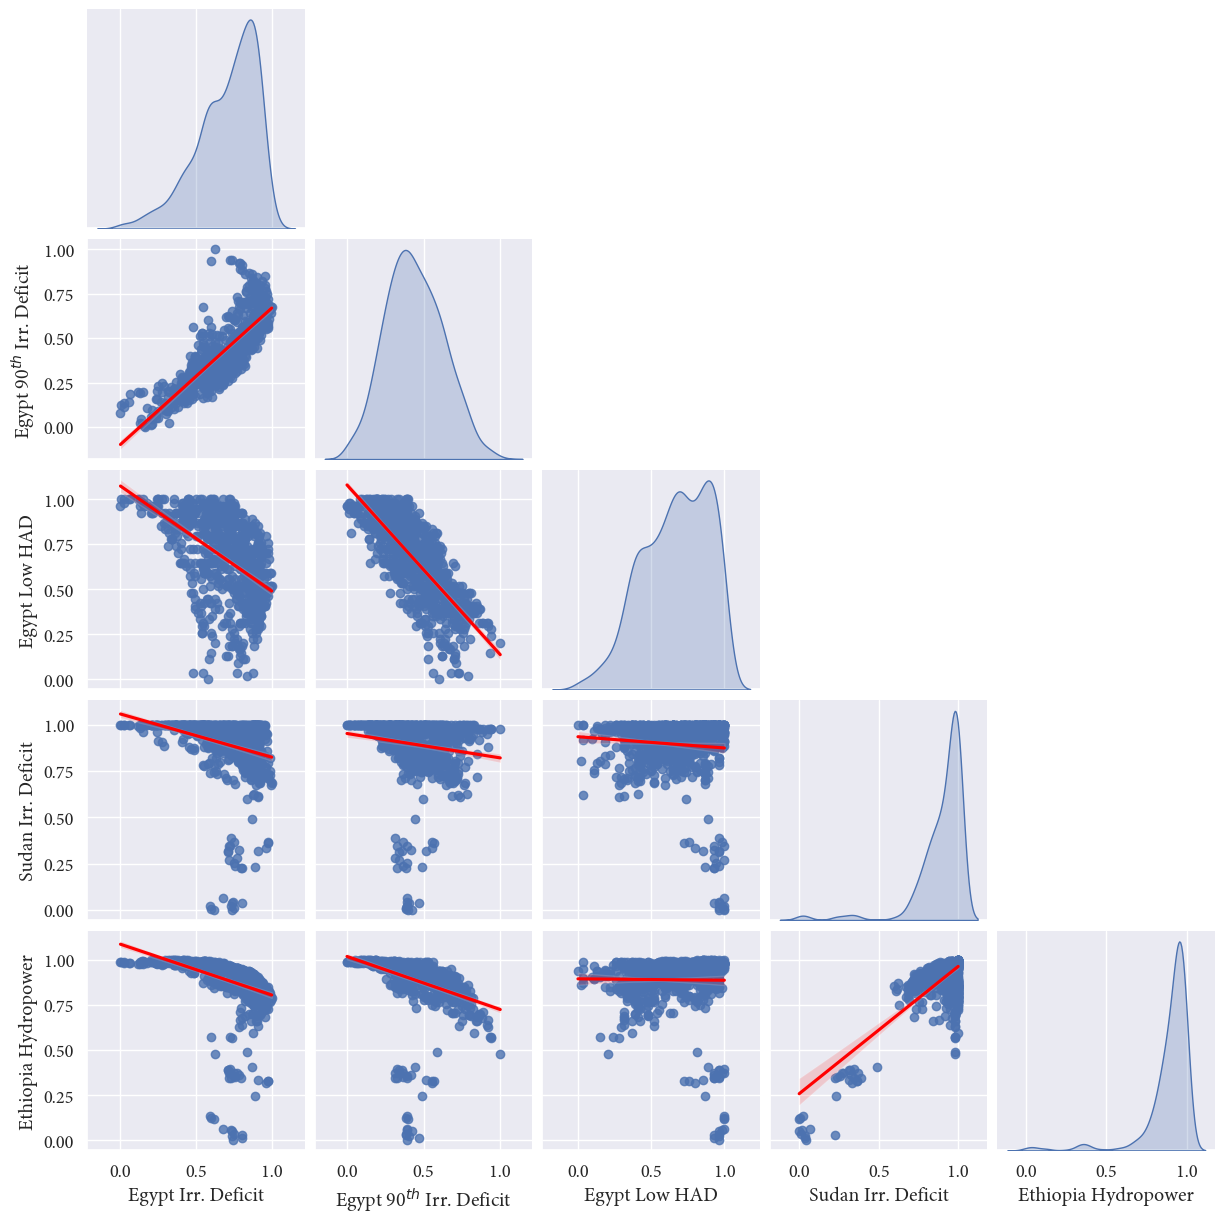

In [24]:
plt.show()

In [25]:
solution_indices = [780,102, 81, 385, 181, 653]
solutions = [policies.loc[i] for i in solution_indices]
solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$", "Best Egypt HAD & Sudan", "Best Ethiopia Hydropower",
                  "Compromise: Percentile Threshold", "Compromise: Absolute Threshold"]

In [26]:
nile_model = ModelNile()
nile_model = generate_input_data(nile_model, sim_horizon=20)
nile_model.evaluate(solutions[0])

(3.8275880523016506, 1.4687617196326506, 0.0, 0.0, 0.0, 13.16696149181364)

In [32]:
totsum = 0
for catch in nile_model.catchments.values():
    totsum += np.sum(catch.inflow*30*24*3600*1e-9/20)
    
print(totsum)

104.79449156545688


In [33]:
totsum = 0
for irr in nile_model.irr_districts.values():
    totsum += np.sum(irr.demand*30*24*3600*1e-9/20)
    
print(totsum)

81.29937723982894


In [30]:
# bcm_def_egypt = [month * 3600 * 24 * nile_model.nu_of_days_per_month[i % 12] * 1e-9
#                          for i, month in enumerate(nile_model.irr_districts["Egypt"].deficit)]

In [36]:
# np.percentile(
#             bcm_def_egypt, 90, interpolation="closest_observation"
#         )

<ipython-input-36-12c632122693>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  np.percentile(


0.45713312984397964

In [40]:
print((nile_model.irr_districts["Egypt"].demand*3600*24*30*1e-9)[-12:].sum())
print((nile_model.irr_districts["Egypt"].deficit*3600*24*30*1e-9)[-12:].sum())
print((nile_model.irr_districts["Egypt"].received_flow*3600*24*30*1e-9)[-12:].sum())

79.70307912249487
12.427218248409224
67.27586087408565


In [41]:
print((nile_model.irr_districts["Egypt"].demand*3600*24*30*1e-9).sum())
print((nile_model.irr_districts["Egypt"].deficit*3600*24*30*1e-9).sum())
print((nile_model.irr_districts["Egypt"].received_flow*3600*24*30*1e-9).sum())

1329.3247773432372
42.39824212375971
1286.9265352194775


In [46]:
16357.346498364082*3600*24*365*1e-9/12

42.98710659770081

In [48]:
m3s_to_bcm_per_year(16357.346498364082)*20/12

42.98710659770081

-------------------------------------------------
Best Egypt Irr (16357.346498364082, 179.34176453279247, 0.10833333333333334, 709.6833752370225, 0.0, 7.945437970150134)


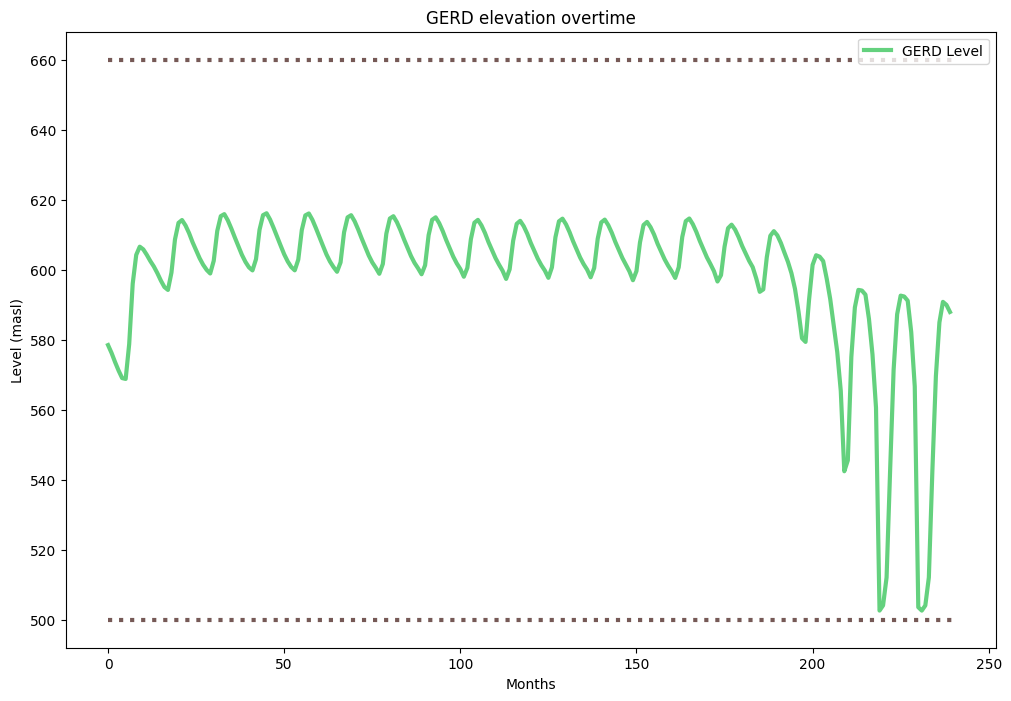

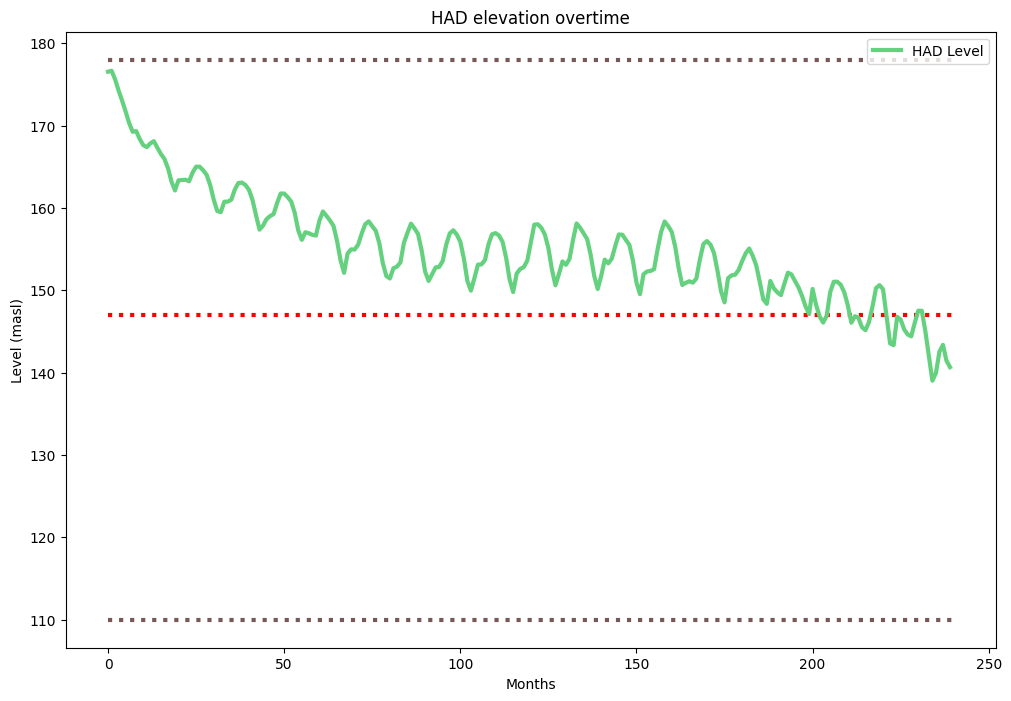

-------------------------------------------------
Best Egypt $90^{th}$ (22525.24227941626, 65.76521899050294, 0.17916666666666667, 49.463894089789875, 0.0, 7.046422415590297)


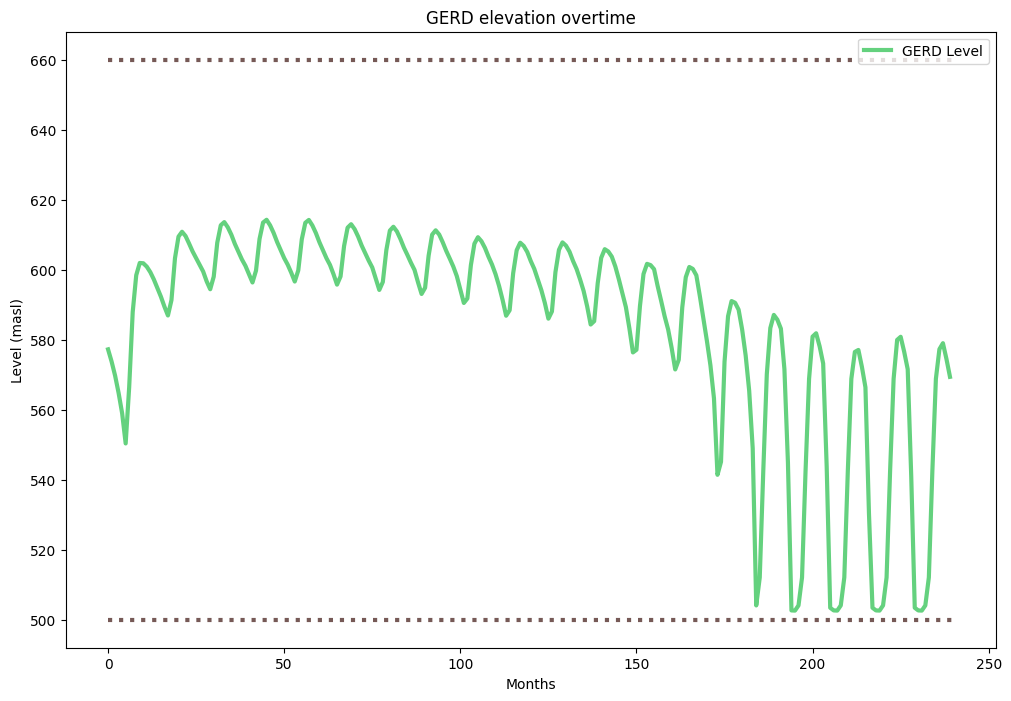

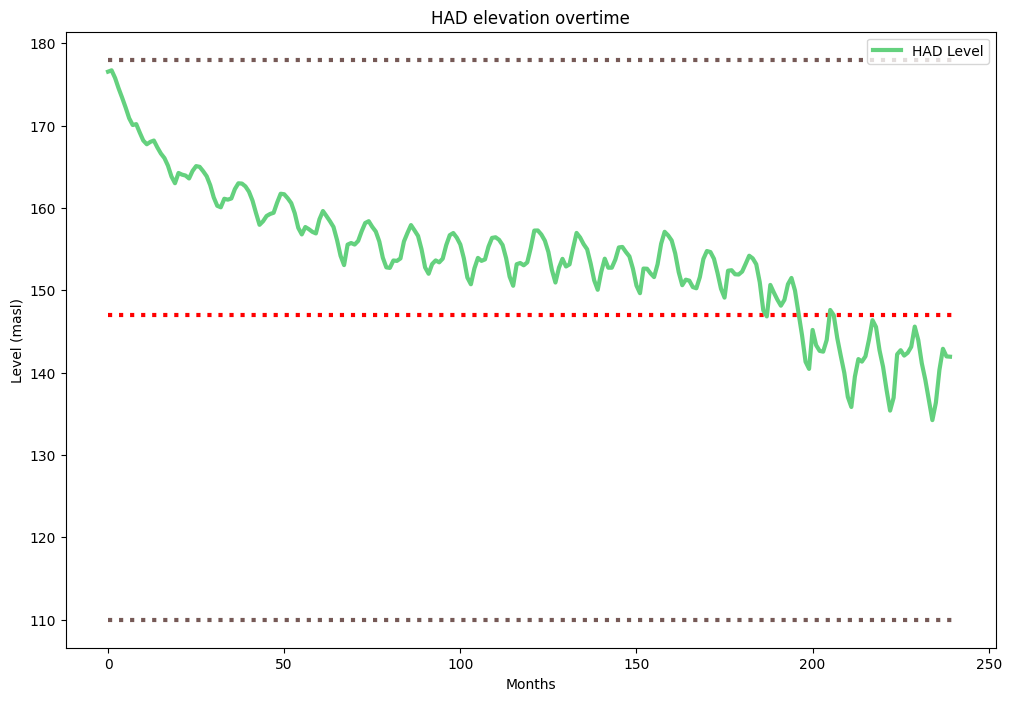

-------------------------------------------------
Best Egypt HAD & Sudan (31885.155606737157, 349.74179960052675, 0.0, 0.0, 0.0, 8.506525032935288)


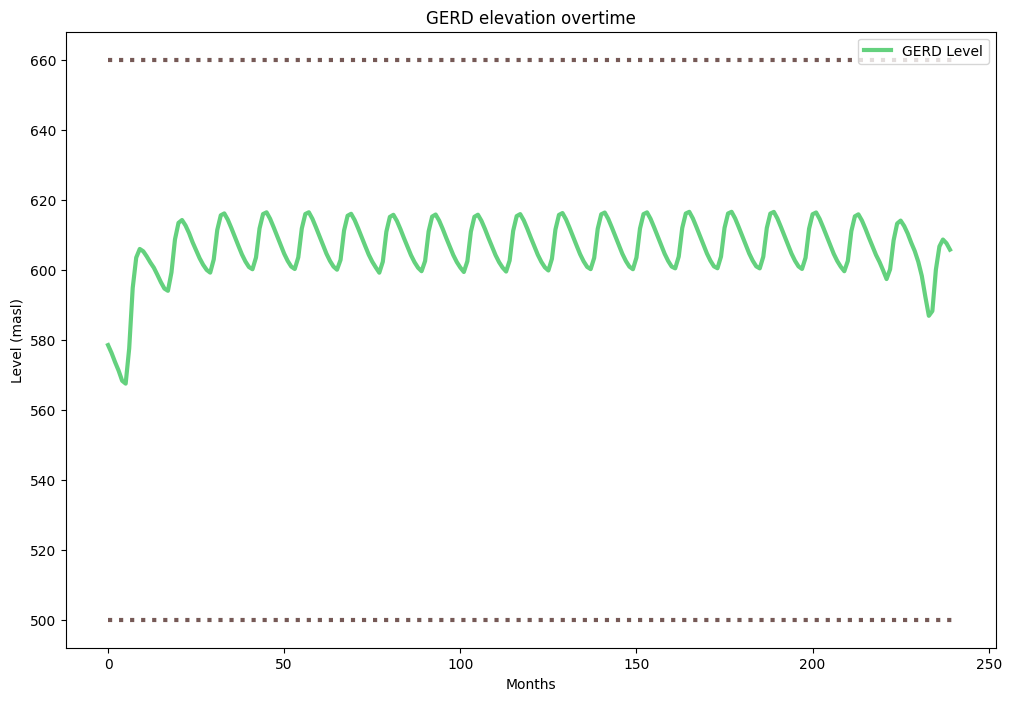

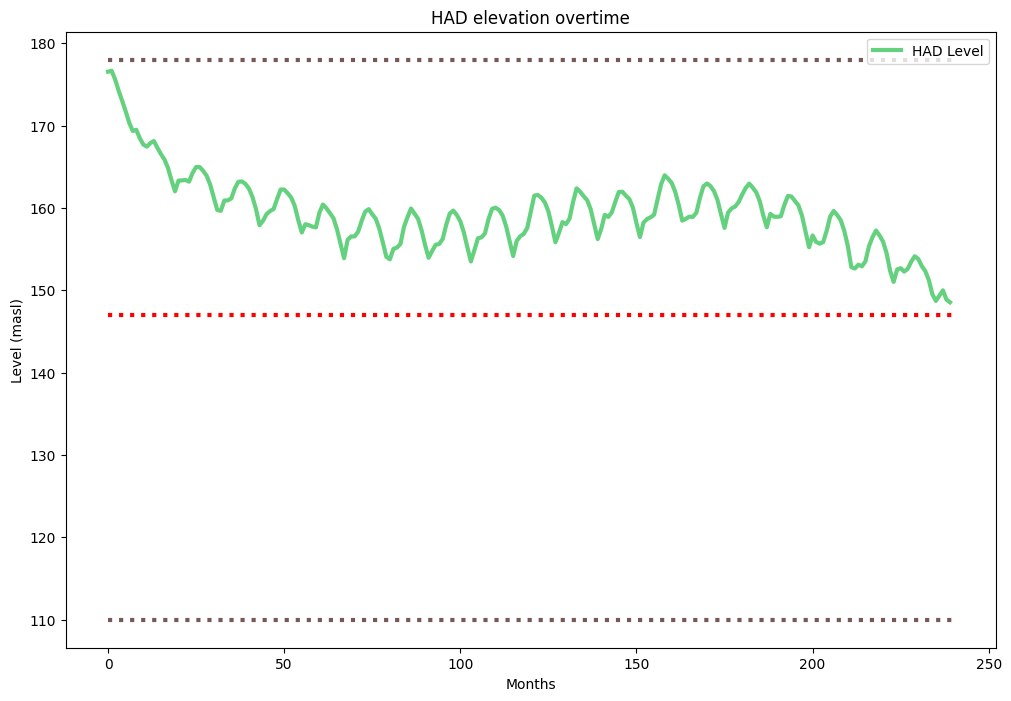

-------------------------------------------------
Best Ethiopia Hydropower (25930.909735998197, 363.1718957818198, 0.029166666666666667, 0.0, 0.0, 8.564239529224617)


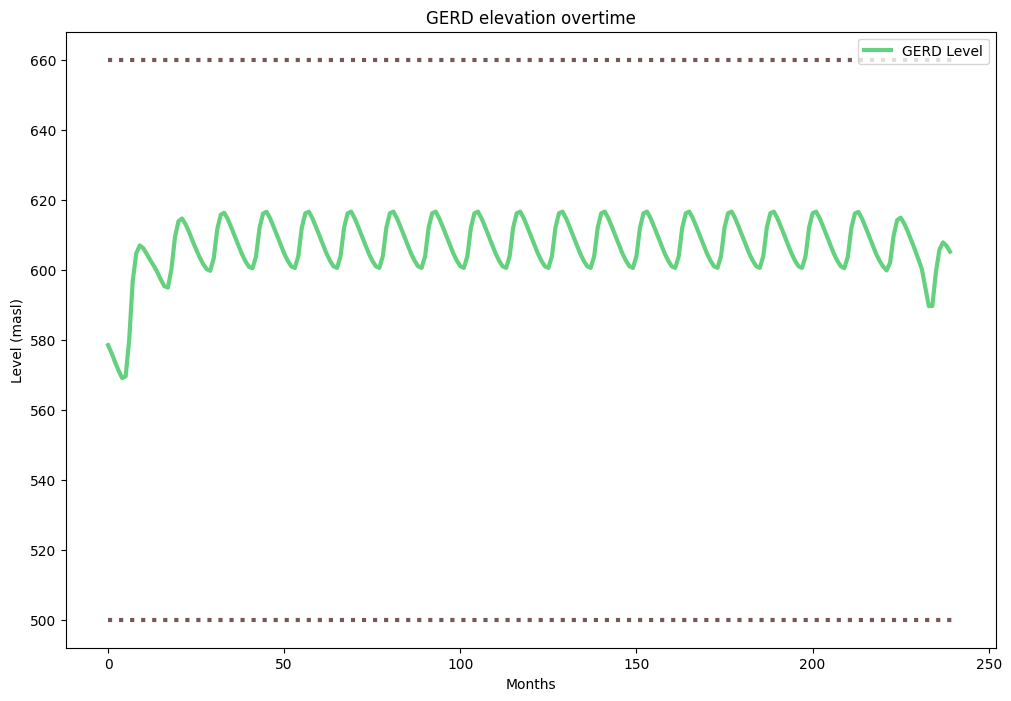

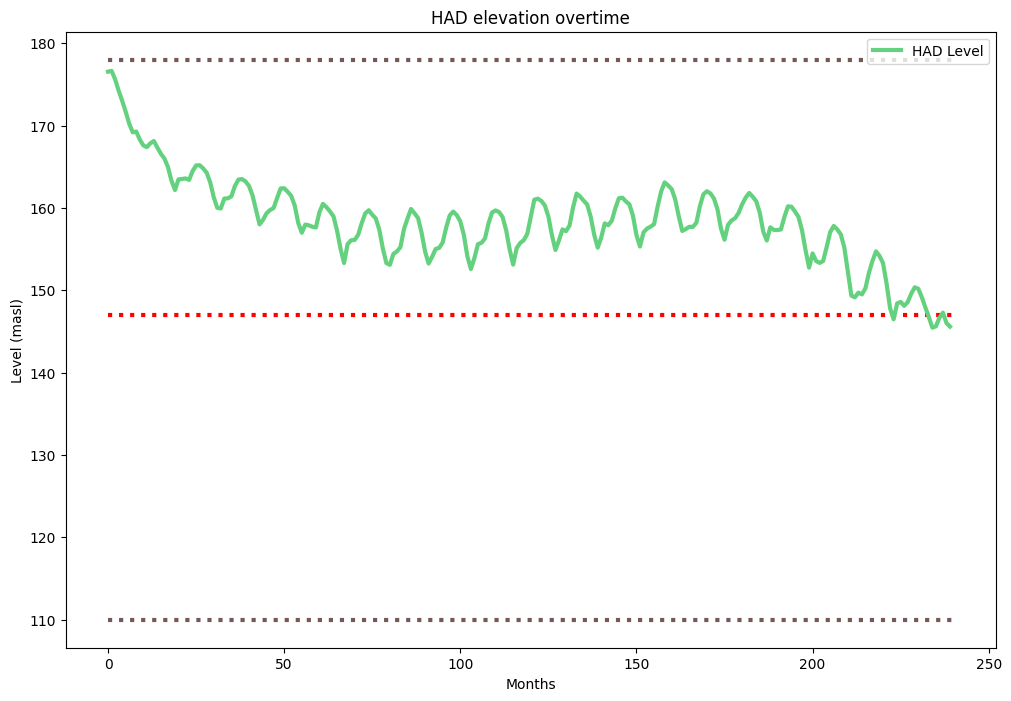

-------------------------------------------------
Compromise: Percentile Threshold (20062.815815901147, 265.69489305436264, 0.0625, 76.40979640110987, 0.0, 8.383083636904255)


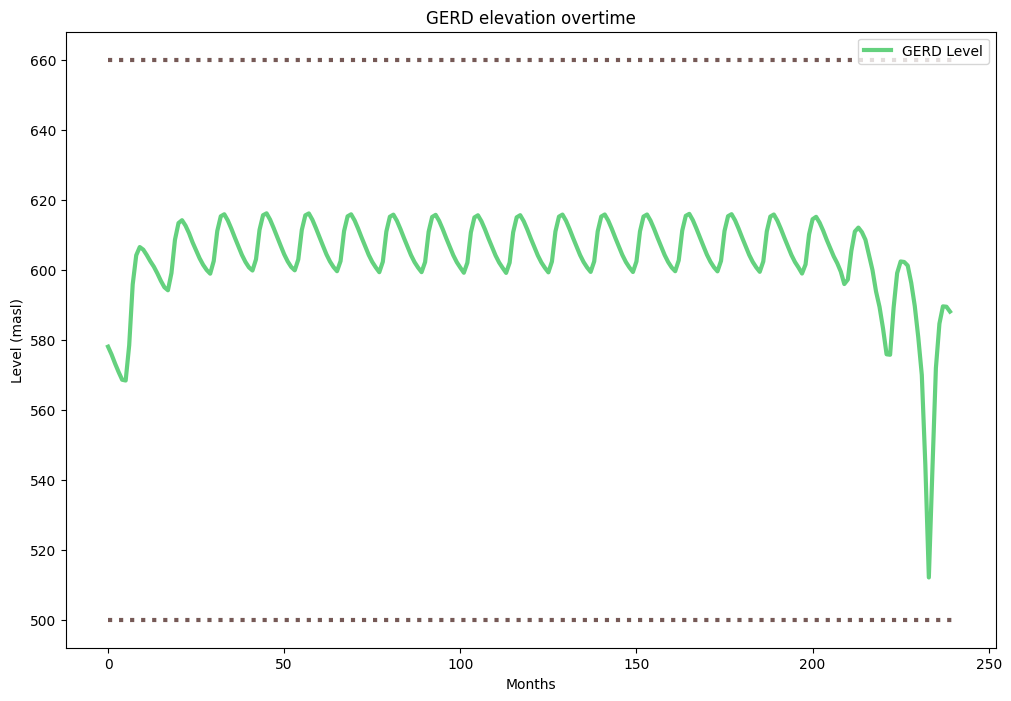

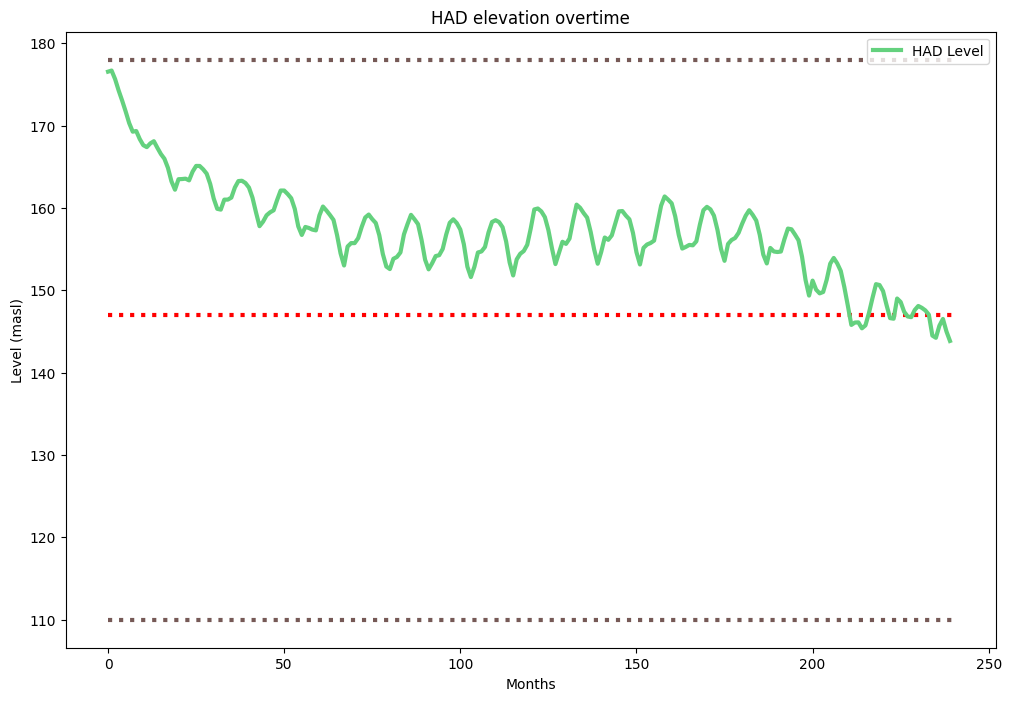

-------------------------------------------------
Compromise: Absolute Threshold (17837.36715104791, 196.30126238234607, 0.08333333333333333, 555.1402082345224, 0.0, 8.243687993043359)


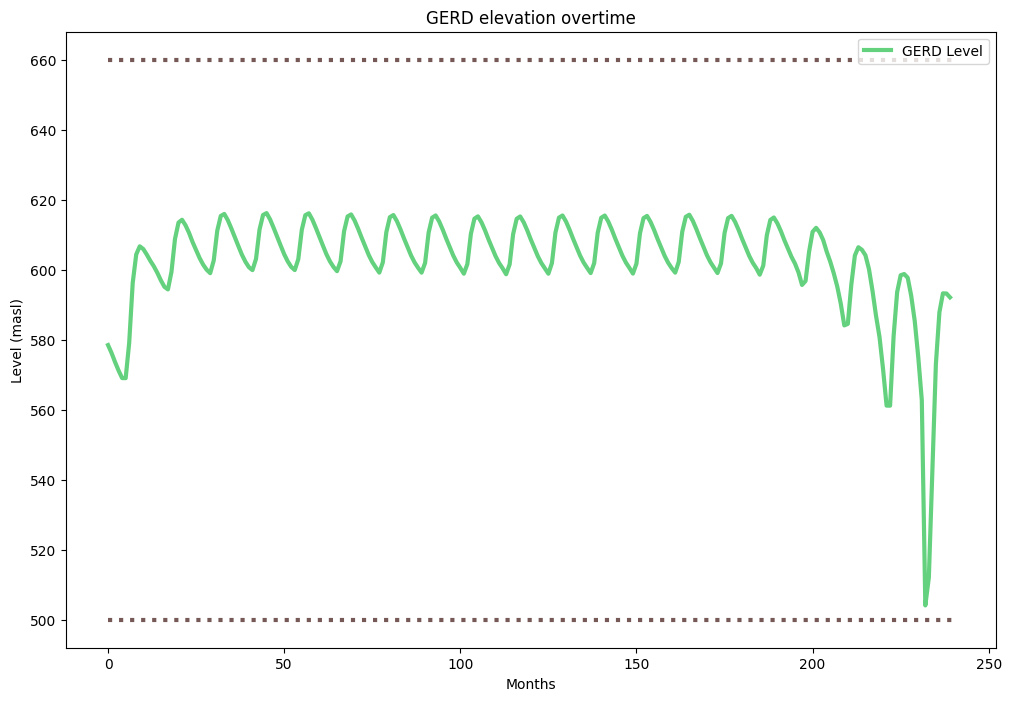

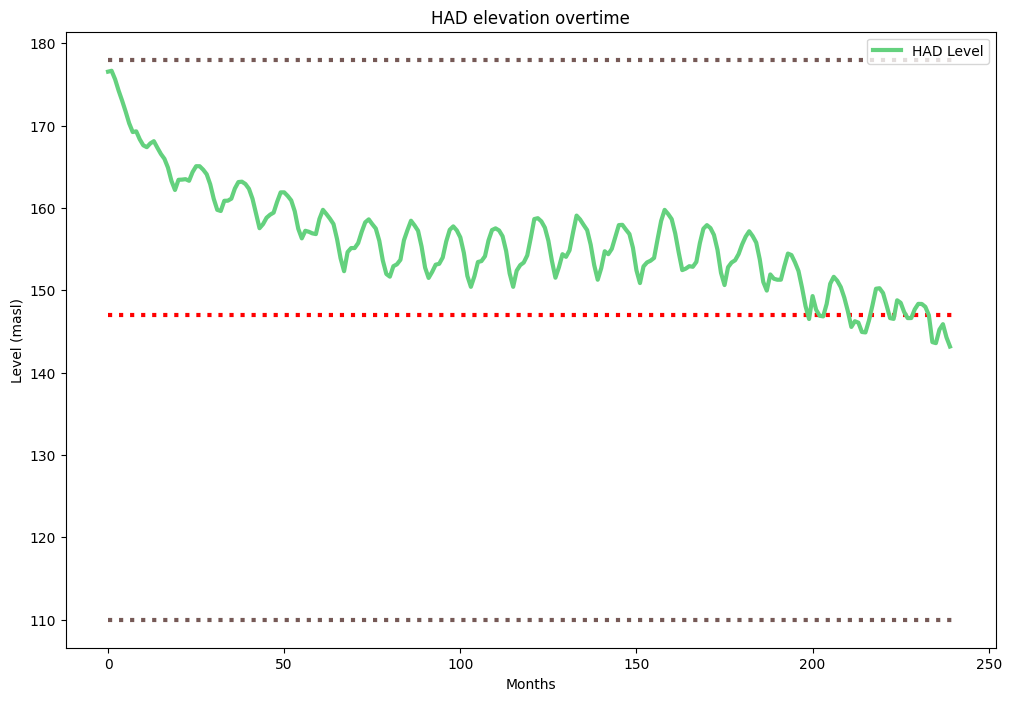

In [27]:
#release_list = []

for i, policy in enumerate(solutions):
    nile_model = ModelNile()
    nile_model = generate_input_data(nile_model, sim_horizon=20)
    
    print("-------------------------------------------------")
    print(solution_names[i], nile_model.evaluate(policy))
    
    plotter = HydroModelPlotter(nile_model)
    
    # ax_inflow_vs_released = plotter.plot_inflow("GERD")
    # ax_inflow_vs_released = plotter.plot_release("GERD", label=policy_names[i], ax=ax_inflow_vs_released)
    
    #release_list.append(nile_model.reservoirs["GERD"].release_vector)
    
    
    
#     for reservoir in nile_model.reservoirs.keys():
#         #plotter.plot_condensed_inflow_separated(reservoir, policy_names[i])
#         #plotter.plot_condensed_release_separated(reservoir, policy_names[i])
#         #plotter.plot_condensed_level_separated(reservoir, policy_names[i])
        
#         plotter.plot_condensed_release_versus_inflow(reservoir, solution_names[i])
#         plotter.plot_condensed_inflow(reservoir, solution_names[i])
#         plotter.plot_condensed_release(reservoir, solution_names[i])
#         plotter.plot_condensed_level(reservoir, solution_names[i])
        
    plotter.plot_level_with_limits("GERD")
    plotter.plot_level_with_limits("HAD")
        
#     for district in ["Egypt"]: #nile_model.irr_districts.keys():
#         plotter.plot_received_vs_demand_for_district(district)
#         plotter.plot_received_vs_demand_for_district_raw(district)
        
    
    

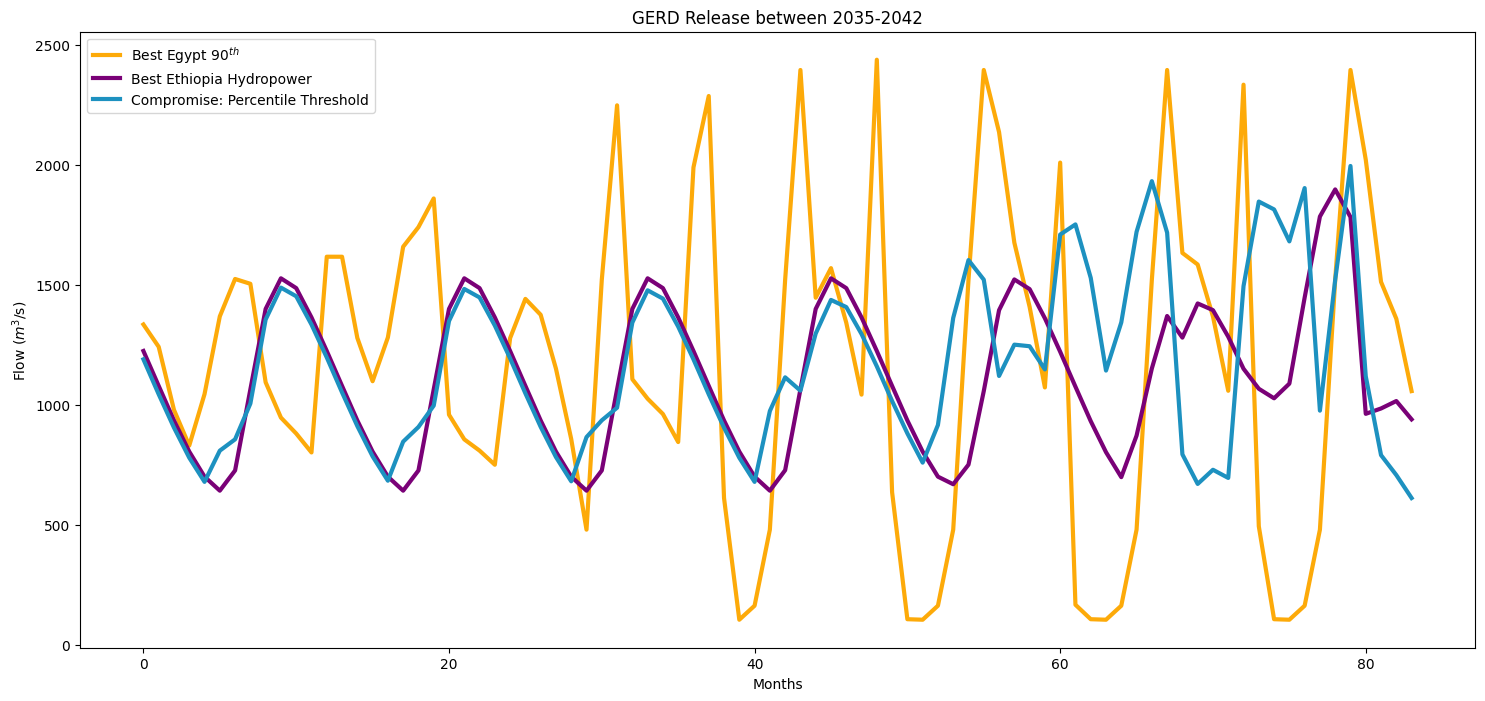

In [41]:
gray='#bdbdbd'
purple='#7a0177'
green='#41ab5d'
blue='#1d91c0'
yellow='#fdaa09'
pink='#c51b7d'

release_60 = [release_list[i][-84:] for i in range(len(release_list)) if i in [1,3,4]]

plotter.plot_multiple_lines_together(release_60, 
                                     ["Best Egypt $90^{th}$",
                                      "Best Ethiopia Hydropower",
                                      "Compromise: Percentile Threshold"],
                                     title="GERD Release between 2035-2042",
                                     x_title="Months",
                                     y_title="Flow ($m^{3}$/s)",
                                     colors=[yellow, purple, blue]
                                    )

In [17]:
# test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro]
# nile_model = generate_input_data(nile_model, sim_horizon=20)
# model_plotter = HydroModelPlotter(nile_model)

# for pol in test_policies:
#     nile_model.evaluate(pol)
#     model_plotter.plot_received_vs_demand_for_district("Egypt")
#     model_plotter.plot_received_vs_demand_for_district("Gezira")
    
#     for dam in nile_model.reservoir_names:
#         model_plotter.plot_level_with_limits(dam)
#         model_plotter.plot_levels_condensed(dam)
    

In [82]:
def parallel_plots(objectives_df, solution_indices = [], solution_names = []):
    file_name='Best_objectives'

    names= list(objectives_df.columns)
    
    names_display = ['Egypt_irr','Egypt90_irr','Egypt_low_HAD','Sudan_irr','Ethiopia_hydro']
    units=['BCM/year','m3/s','%','BCM/year','TWh/year']
    directions=["min", "min", "min", "min", "max"]
    
    norm_df, desirability_couples = normalize_objs(objectives_df, directions)
    
    uds=[] #undesired
    ds=[] #desired
    for i in desirability_couples:
        uds.append(str(round(i[0], 1)))
        ds.append(str(round(i[1], 1)))
    
    norm_df['Name'] = "All Solutions"
    for i, solution_index in enumerate(solution_indices):
        norm_df.loc[solution_index, "Name"] = solution_names[i]
        norm_df = norm_df.append(norm_df.loc[solution_index,:].copy())
    
    fig = plt.figure()

    ax1 = fig.add_subplot(111)

    gray='#bdbdbd'
    purple='#7a0177'
    green='#41ab5d'
    blue='#1d91c0'
    yellow='#fdaa09'
    pink='#c51b7d'

    parallel_coordinates(norm_df,'Name', color= [gray,purple,yellow,blue,pink,green,"red"], linewidth=7, alpha=.8)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=1.5, fontsize=18)
    
    ax1.set_xticks(np.arange(len(names)))
    
    ax1.set_xticklabels([uds[i]+'\n'+'\n'+names[i]+'\n'+units[i] for i in range(len(names))],
                        fontsize=18)
    ax2 = ax1.twiny()
    ax2.set_xticks(np.arange(len(names)))
    ax2.set_xticklabels([ds[i] for i in range(len(names))], 
                        fontsize=18)
    
    ax1.get_yaxis().set_visible([])
    plt.text(1.02, 0.5, 'Direction of Preference $\\rightarrow$', {'color': '#636363', 'fontsize': 20},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    fig.set_size_inches(17.5, 9)
    plt.show()

In [83]:
objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,ethiopia_hydro
0,30756.347466,405.222143,0.008333,0.000000,3.251154e+07
1,21022.203556,277.429739,0.016667,1470.246617,5.995508e+06
2,25122.257813,286.975361,0.104167,0.000000,3.220148e+07
3,23272.987115,236.067736,0.150000,68.840364,3.138020e+07
4,26440.156002,310.429921,0.079167,0.000000,3.251154e+07
...,...,...,...,...,...
845,18506.815675,144.778832,0.129167,77.186038,2.346972e+07
846,18382.679249,218.740521,0.100000,127.865400,2.718407e+07
847,26817.784397,358.505919,0.016667,0.000000,3.130520e+07
848,21964.758312,317.305943,0.016667,314.168930,2.912748e+07
